<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 
<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 150px; display: inline"  alt="Wikistat"/></a>
<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" width=400,  style="float:right;  display: inline" alt="IMT"/> </a>
    
</center>

# High Dimensional & Deep Learning : Image classification  on MNIST dataset.

## Objectives
In this TP you will learn to : 
* Write multilayer perceptron and convolutional network with `Keras`and `Tensorflow`
* Understand how `convolutional`, `max pooling`, `stride` and `padding`layers work.
* Use these models for image classification.

## Libraries

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import tensorflow.keras.utils as ku
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
import tensorflow.keras.optimizers as ko
import tensorflow.keras.preprocessing.image as k

from sklearn.metrics import confusion_matrix

2022-09-27 16:34:02.186842: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/insa/lib:$LD_LIBRARY_PATH
2022-09-27 16:34:02.186864: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import tensorflow
tensorflow.__version__

'2.4.0'

This code lines allow you to check if your computer is using CPU or GPU ressources. <br>
**Warning** : You won't be able to use GPU if another notebook is open and still uses GPU.

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11182558563227403242
]


2022-09-27 16:34:12.455492: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-27 16:34:12.459467: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/insa/lib:$LD_LIBRARY_PATH
2022-09-27 16:34:12.459480: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-27 16:34:12.459493: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (insa-12588): /proc/driver/nvidia/version does not exist


## Dataset 

The dataset that will be used in this TP is the [MNIST DataBase](http://yann.lecun.com/exdb/mnist/).<br>
It is composed of 70.000 images (60.000 for learning, 10.000 for test) of 28x28 pixels of handwritten digits from 0 to 9.<br>

These data are directly available on the `Keras` library.

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

N_train, N_x_pixels, N_y_pixels = X_train.shape
N_test = X_test.shape[0]
N_classes = len(set(Y_train))

print("Train data : %d images  (%d/%d pixels)" %(N_train, N_x_pixels, N_y_pixels))
print("Test data : %d images  (%d/%d pixels)" %(N_test, N_x_pixels, N_y_pixels))

Train data : 60000 images  (28/28 pixels)
Test data : 10000 images  (28/28 pixels)


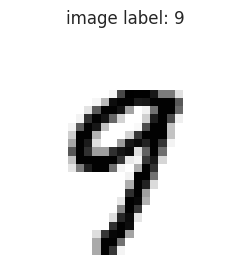

In [5]:
sample_index = 45
fig =plt.figure(figsize=(3, 3))
ax = fig.add_subplot(1,1,1)

ax.imshow(X_train[sample_index], cmap=plt.cm.gray_r, interpolation='nearest') 
ax.set_title("image label: %d" % Y_train[sample_index])
ax.grid(False)
ax.axis('off')
plt.show()

### Image example

## Image classification with Multi Layer Perceptron model.

We will first try to learn an image classifier with a MLP model with the following architecture.

* A Dense layer with 128 neurons and *relu* activation function
* A Dropout Layer with 20% drop rate
* A Dense layer with 128 neurons and *relu* activation function
* A Dropout Layer with 20% drop rate
* A Dense layer with 10 neurons (Number of classes ) and *softmax* activation function

### Data format

Some modifications are required on the data to use them with our model. 

The first layer is a Dense Layer, which handles 1D vectors as an input. We must first reshape the 2D 28x28 images as a 1D $28*28=784$ vector.

In [6]:
X_train_flatten = X_train.reshape((N_train, N_x_pixels*N_y_pixels))/255 #renormalisation manuelle entre 0 et 1 (les données étaient entre 0 et 255)
X_test_flatten = X_test.reshape((N_test, N_x_pixels*N_y_pixels))/255
N_dim_flatten = X_train_flatten.shape[1]
print("Dimensions of flatten train images : %d X %d" %(X_train_flatten.shape))
print("Dimensions of flatten test images : %d X %d" %(X_test_flatten.shape))

Dimensions of flatten train images : 60000 X 784
Dimensions of flatten test images : 10000 X 784


### Architecture 

In [7]:
# Définition du réseau
model = km.Sequential()
model.add(kl.Dense(128, activation='relu', input_shape=(N_dim_flatten,)))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(N_classes, activation='softmax'))
# Résumé
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2022-09-27 16:34:13.194746: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-27 16:34:13.194894: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [8]:
print("couche 1", (28*28+1)*128)
print("couche 2", (128+1)*128)
print("couche 3", (128+1)*10)

couche 1 100480
couche 2 16512
couche 3 1290


Le drop out met a 0 un certain pourcentage des neurones de la couche créée pour éviter le suraprentissage.

**Q** The summary displays the number of pararameters/weigths of the model. Retrieve these values with the formulas seen in the course.

### Training

You will now instantiate your model by defining :
* An optimizer : `RMSprop`
* a loss function : `Categorical crossentropy`
* Metric : This argument is an option, it allows to compute the metric if you want to check the evolution of the training. Here we choose to compute the accuracy during the training.

**Note** : In Keras you can choose either "sparse_categorical_crossentropy" or "categorical_crossentropy" loss. The former handles 1D (NX1) vectors where each entry contains the label of the data, i.e [0,3,5,9,3,4,...]. The latter handles only one-hot encoding of this vector, ie  2D vectors (NXN_classes) matrices. Keras has a `to_categorical` function which allows to convert a vector to its one-hot encoding representation.

In [9]:
model.compile(loss='sparse_categorical_crossentropy', #fonction perte en multiclassification
              optimizer=ko.RMSprop(),  #optimisateur pour les réseaux de neurones 
              metrics=['accuracy'])

In [10]:
batch_size = 256
epochs=10
ts = time.time()  #début de l'entrainement
history = model.fit(X_train_flatten, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_flatten, Y_test))
te = time.time() #fin de l'entrainement 
t_train_mpl = te-ts

2022-09-27 16:34:13.547260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-27 16:34:13.591533: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.7428 - accuracy: 0.7787 - val_loss: 0.1839 - val_accuracy: 0.9440
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.2213 - accuracy: 0.9342 - val_loss: 0.1282 - val_accuracy: 0.9594
Epoch 3/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1563 - accuracy: 0.9532 - val_loss: 0.1044 - val_accuracy: 0.9690
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1242 - accuracy: 0.9624 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9677 - val_loss: 0.0927 - val_accuracy: 0.9728
Epoch 6/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9705 - val_loss: 0.0847 - val_accuracy: 0.9748
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9743 - val_loss: 0.0746 - val_accuracy: 0.9775
Epoch 

### Results

Test loss: 0.07377049326896667
Test accuracy: 0.9787999987602234
Time Running: 7.84 seconds


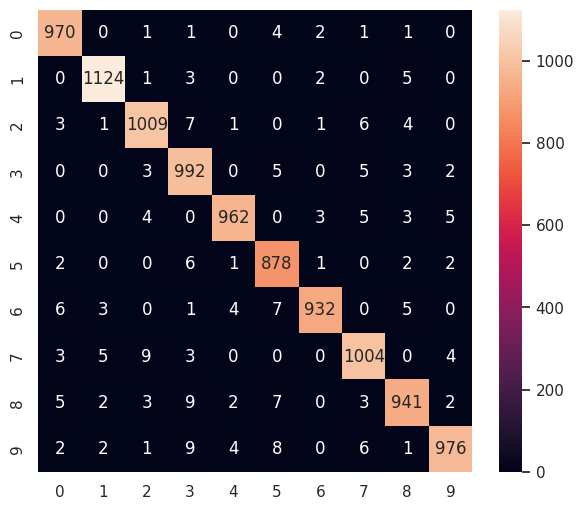

In [11]:
score_mpl = model.evaluate(X_test_flatten, Y_test, verbose=0) #renvoie la loss et l'accuracy
predict_mpl = model.predict(X_test_flatten) #renvoie pour chaque donnée test le vecteur de proba d'appartenance à chaque classe
print('Test loss:', score_mpl[0])
print('Test accuracy:', score_mpl[1])
print("Time Running: %.2f seconds" %t_train_mpl )
fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax = sb.heatmap(pd.DataFrame(confusion_matrix(Y_test, predict_mpl.argmax(1))), annot=True, fmt="d")


**Question** What can you say about these results?

**Exercise** Normalize the data in order to have values between 0 and 1 and run again the learning. What can you say about these results?

Les chiffres sont bien classifiés de manière homogène et les erreurs ne semblent pas porter sur une combinaison en particulier. En ne renormalisant pas les données, on perd 1% d'accuracy. 
Il faut renormaliser pour ne pas que les valeurs intermédiaires explosent

## Convolutional Layers

In this part we will use convolution layers to build a convolutional classifier.


**Data**

The convolution architecture takes as input images and not 1D vectors. However, some data formating are still required.

A third dimension is required : the `channels` dimension which will allow to describe each pixel. In our case this dimension's size is only 1 because the images are only defined with grey scale. However for colour images, each pixel is coded with several values (Images are generally encoded with 3 values (RGB channels)). 

Hence, we need to reshape the images from a 28x28 dimension to a 28X28X1 dimension

In [12]:
X_train_conv = np.expand_dims(X_train,axis=-1) #passer d'une image en deux dimensions en 3 dimensions (en rajoutant la dimension du canal)
X_test_conv = np.expand_dims(X_test,axis=-1) 
X_train_conv.shape

(60000, 28, 28, 1)

### Edge detection

We will first check the transformation applied by a convolution layer.

In the following code, we define a convolutional network with  only one filter for which we manually define the weights.

In [13]:
conv_filter1 = np.array([ #détecte les traits vertical
        [0.2, -0.2, 0],
        [0.2, -0.2, 0],
        [0.2, -0.2, 0],
    ]) 

conv_filter = np.array([ # détecte les traits horizontaux
        [0.2, 0.2, 0.2],
        [0, 0, 0],
        [-0.2, -0.2, -0.2],
    ]) 

def my_init_filter(shape, conv_filter = conv_filter, dtype=None, partition_info=None):
    xf,yf = conv_filter.shape
    array = conv_filter.reshape(xf, yf, 1, 1)
    return array

my_init_filter(0).shape

conv_edge = km.Sequential([
    kl.Conv2D(kernel_size=(3,3), filters=1, kernel_initializer=my_init_filter, input_shape=(28, 28, 1))   #modèle avec une seule couche 
])

 **Q** Note that in  `my_init_filter` two dimensions have been added to the conv filter. What do these dimensions represent?
 
 <span style="color: #26B260"> Il y a 4 dimensions qui correspondent à la hauteur, largeur, nombre de channels, nombre de filtres. 

 The following code allows to display the image, the filter and the convoluted image.

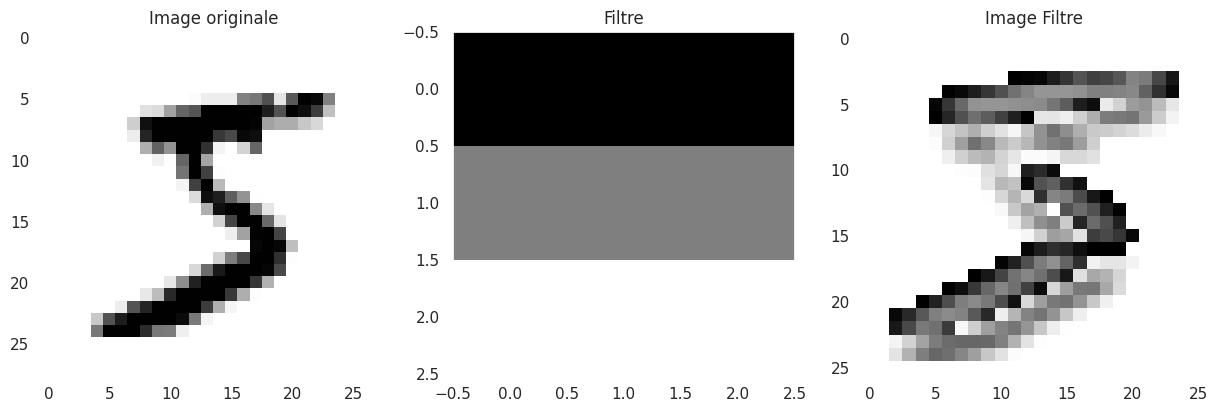

In [14]:
x = X_train_conv[0]
img_in = np.expand_dims(x, 0) #passer d'une taille de (l,L,c) à (1, l,L,c) pour dire qu'il y a qu'une image. le .expands(x,0) ajoute à gauche une dimension
img_out = conv_edge.predict(img_in)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))
ax0.imshow(img_in[0,:,:,0], cmap="binary")
ax0.set_title("Image originale")
ax0.grid(False)

norm_conv_filter = (conv_filter-conv_filter.min())/conv_filter.max() #passer à des valeurs entières dans l'image pour pouvoir l'afficher 
ax1.imshow(norm_conv_filter.astype(np.uint8), cmap="binary")
ax1.set_title("Filtre")
ax1.grid(False)

ax2.imshow(img_out[0,:,:,0].astype(np.uint8), cmap="binary")
ax2.set_title("Image Filtre")
ax2.grid(False)


**Q** What do you see? Are the output image coherent according to the designed filter ?

On peut voir les bandes du filtre dans l'image reproduite. Le filtre a quand mëme réussi à extraire les contours du nombre. 

**Exercise** Change the code in order to test different filters (to detect horizontal edges, etc...)

### Strides and Padding

We will now study the effect on `strides` and `padding` arguments on the image.


In [15]:
conv_filter = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0],
    ])

def my_init_filter(shape, conv_filter = conv_filter, dtype=None, partition_info = None):
    xf,yf = conv_filter.shape
    array = conv_filter.reshape(xf, yf, 1, 1)
    return array
    
my_init_filter(0).shape

conv_sp = km.Sequential([
    kl.Conv2D(kernel_size=(3,3), filters=1, kernel_initializer=my_init_filter, input_shape=(28, 28, 1),
           strides=2, padding="SAME") ])

**Q** What is the effect of the convolutional filter defined here ? 

Il conserve la valeur du pixel au centre de la sous image parcourue par le filtre. Le filtre doit être de taille impaire de manière à travailler sur le voisinage d'un pixel qui existe vraiment.La taille est diminuée 



In [16]:
(28+2*1-3)/2+1

14.5

image en entrée : (28, 28)image en sortie: (14, 14)


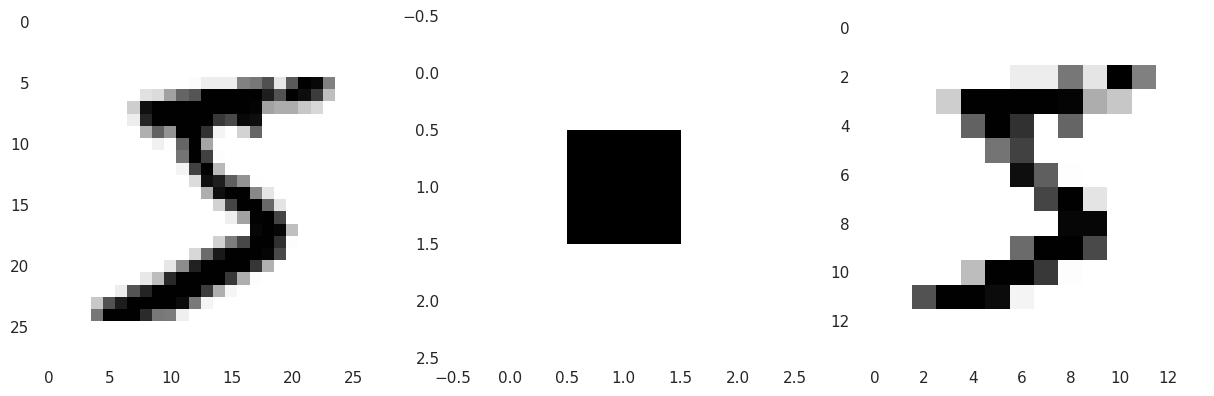

In [17]:
img_in = np.expand_dims(x, 0)
img_out = conv_sp.predict(img_in)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))
ax0.imshow(img_in[0,:,:,0].astype(np.uint8),
           cmap="binary");
ax0.grid(False)

norm_conv_filter = (conv_filter-conv_filter.min())/conv_filter.max()
ax1.imshow(norm_conv_filter.astype(np.uint8),
           cmap="binary");
ax1.grid(False)

print("image en entrée : "+str(img_in[0,:,:,0].shape)+"image en sortie: "+str(img_out[0,:,:,0].shape))
ax2.imshow(img_out[0,:,:,0].astype(np.uint8),
           cmap="binary");
ax2.grid(False)

**Exercise** Check the dimension of the output images. Are they coherent? <br>
**Exercise** Change both *strides* and *padding* arguments and understand the effect of these changes.

En appliquant ce filtre, on ne conserve que la valeur centrale dans un carré de 9 pixels. Donc, on perd en résolution, mais le résultat est toujours visibles. Avec ce filtre on ne s'est pas restreints à cherhcer des traits soit verticaux, soit horizontaux, ce qui est bien puisque les deux sont présents dans l'image. 

On a une dimension de 14, c'est normal car il y a un stride de 2, donc on décale de 2 pixels à chaque opération de convolution. 

### Max Pooling

**Exercice** Write a similar code than above to check and understand the behaviour of the `max pooling` layer.

In [18]:
# %load solutions/max_pooling.py

conv_sp = km.Sequential([
    kl.MaxPooling2D(pool_size = 3, strides = 1)])

(1, 26, 26, 1)
image en entrée : (28, 28)image en sortie: (26, 26)


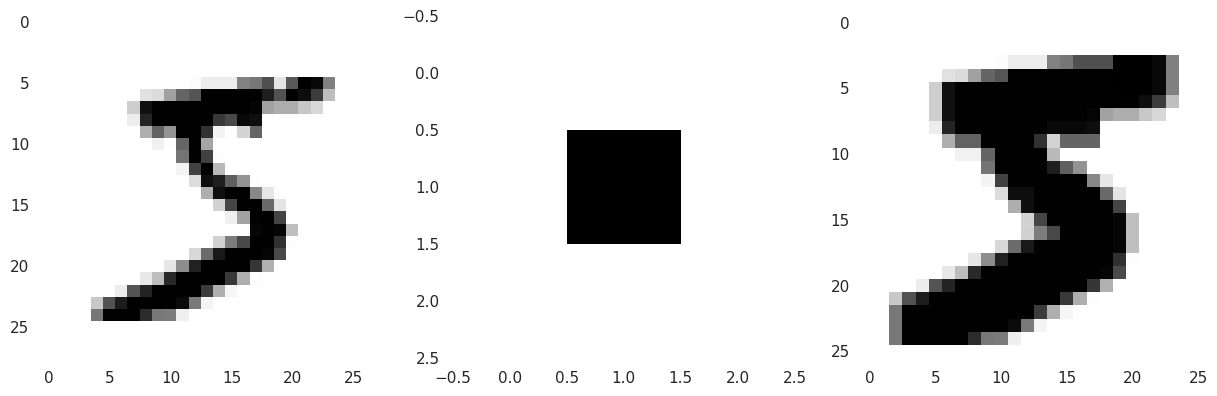

In [19]:
img_in = np.expand_dims(x, 0)
img_out = conv_sp.predict(img_in)
print(img_out.shape)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))
ax0.imshow(img_in[0,:,:,0].astype(np.uint8),
           cmap="binary");
ax0.grid(False)

norm_conv_filter = (conv_filter-conv_filter.min())/conv_filter.max()
ax1.imshow(norm_conv_filter.astype(np.uint8),
           cmap="binary");
ax1.grid(False)

print("image en entrée : "+str(img_in[0,:,:,0].shape)+"image en sortie: "+str(img_out[0,:,:,0].shape))
ax2.imshow(img_out[0,:,:,0].astype(np.uint8),
           cmap="binary");
ax2.grid(False)

**Questions** What are the dimension of the output image? Is this normal?

## *Convolutional Network (ConvNet)*

We will now build convolutional networks and see the performances on this kind of model on  image classification problems.

### LeNet5

We first test the  LeNet5 model, proposed by LeCun et al.

In [20]:
LeNet5model = km.Sequential()
LeNet5model.add(kl.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh',
input_shape = (28,28,1)))
LeNet5model.add(kl.MaxPooling2D(pool_size = 2, strides = 2))
LeNet5model.add(kl.Conv2D(filters = 16, kernel_size = 5,strides = 1, activation = 'tanh'))
LeNet5model.add(kl.MaxPooling2D(pool_size = 2, strides = 2))
LeNet5model.add(kl.Flatten())
LeNet5model.add(kl.Dense(units = 120, activation = 'tanh'))
LeNet5model.add(kl.Dense(units = 84, activation = 'tanh'))
LeNet5model.add(kl.Dense(units = 10, activation = 'softmax'))

LeNet5model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [21]:
print("1ere couche "+str(6*(1+5*5)))
print("2eme couche "+str(16*(1+6*5*5))) #attention ne pas oublier le nombre de canaux 
print("1ere couche dense  "+str(120*(256+1))) #nb neurones de la couche actuelle * (taille de la sortie précédente) + un biais par neurone
print("2eme couche dense  "+str(84*(120+1)))
print("3eme couche dense  "+str(10*(84+1)))

1ere couche 156
2eme couche 2416
1ere couche dense  30840
2eme couche dense  10164
3eme couche dense  850


**Exercise** Retrieve 'manually' the number of parameters of this model.

**Question** What can you say about the total number of parameters compared with the MLP model defined before? Which layer has the highest number of parameters?

Avec le filtre de convolution on a 44 000 paramètres, tandis qu'avec le MLP on aen a 180 000. La première couche dense est celle qui a le plus de paramètres. Les couches denses sont celles qui sont le plus couteuses, et dans le cas d'un MLP, on aque des couches denses.

In [22]:
# Apprentissage
batch_size=128
epochs=10
LeNet5model.compile(loss="sparse_categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])
ts=time.time()
LeNet5model.fit(X_train_conv, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # pour l'affichage
          validation_data=(X_test_conv, Y_test))
te=time.time()
t_train_conv = te-ts

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 2.3246 - accuracy: 0.1621 - val_loss: 2.2489 - val_accuracy: 0.1925
Epoch 2/10
469/469 [==============================] - 4s 10ms/step - loss: 2.2352 - accuracy: 0.1933 - val_loss: 2.1646 - val_accuracy: 0.2376
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 2.1508 - accuracy: 0.2421 - val_loss: 2.0862 - val_accuracy: 0.3004
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 2.0764 - accuracy: 0.3005 - val_loss: 2.0109 - val_accuracy: 0.3637
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 2.0013 - accuracy: 0.3616 - val_loss: 1.9371 - val_accuracy: 0.4187
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 1.9295 - accuracy: 0.4246 - val_loss: 1.8650 - val_accuracy: 0.4703
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 1.8600 - accuracy: 0.4719 - val_loss: 1.7944 - val_accuracy: 0.5169


**Q** Why is the training time longer?

Le modèle a plus de couches (plus profond) et on fait plus d'epochs (30 au lieu de 10).

#### Results

Test loss: 1.5914865732192993
Test accuracy: 0.613099992275238
Time Running: 45.95 seconds


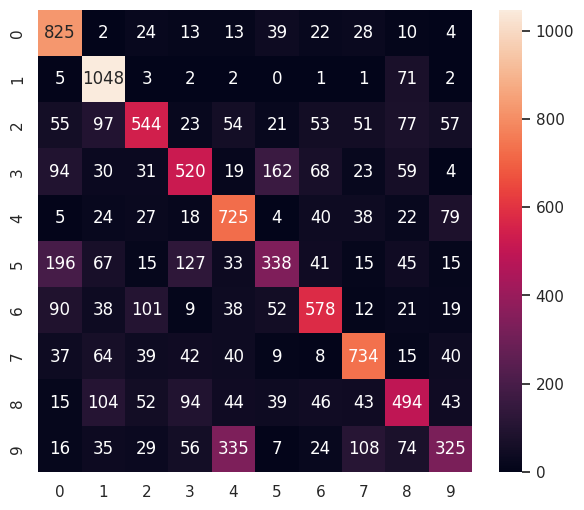

In [23]:
score_conv = LeNet5model.evaluate(X_test_conv, Y_test, verbose=0)
predict_conv = LeNet5model.predict(X_test_conv)
print('Test loss:', score_conv[0])
print('Test accuracy:', score_conv[1])
print("Time Running: %.2f seconds" %t_train_conv )

fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax = sb.heatmap(pd.DataFrame(confusion_matrix(Y_test, predict_conv.argmax(1))), annot=True, fmt="d")


L'accuracy est moins bonne qu'avec le MLP, on a soit fait du surapprentissage ou on n'a pas fait assez d'itérations ou il y a problème d'optimisation ou de choix d'hyperparamètres (optimizer...)

### A more complex architecture

#### Network

We will now design a more complex architecture to try to improve the results of the classification :

* A Conv2D layer with 32-3X3 filters and the `Relu` activation function.
* A Conv2D layer with 64-3X3 filters and the `Relu` activation function.
* A MaxPooling layer with a 2X2 window.
* A Dropout layer with a 25% drop rate.
* A flatten layer.
* A Dense layer with 128 neurons  and the `Relu` activation function.
* A Dropout layer with a 50% drop rate.
* A Dense layer with 10 neurons  and the `softmax` activation function.


**Exercise** Define this model and train it.

In [ ]:
# %load solutions/mnist_conv_architecture.py
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))
# Résumé
model.summary()
# Apprentissage
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])
ts=time.time()
model.fit(X_train_conv, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test))
te=time.time()
t_train_conv = te-ts

In [36]:
# %load solutions/mnist_conv_architecture.py

model = km.Sequential()
model.add(kl.Conv2D(filters = 32, kernel_size = 3, strides = 1, activation = 'relu',
input_shape = (28,28,1)))
model.add(kl.Conv2D(filters = 64, kernel_size = 3,strides = 1, activation = 'relu'))
model.add(kl.MaxPooling2D(pool_size = 2, strides = 1))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(units = 128, activation = 'relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(units = 10, activation = 'softmax'))

model.summary()

# Apprentissage
batch_size=128
epochs=10
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])
ts=time.time()
model.fit(X_train_conv, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # pour l'affichage
          validation_data=(X_test_conv, Y_test))
te=time.time()
t_train_conv = te-ts


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               4333696   
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)             

Test loss: 0.6703450083732605
Test accuracy: 0.859499990940094
Time Running: 566.44 seconds


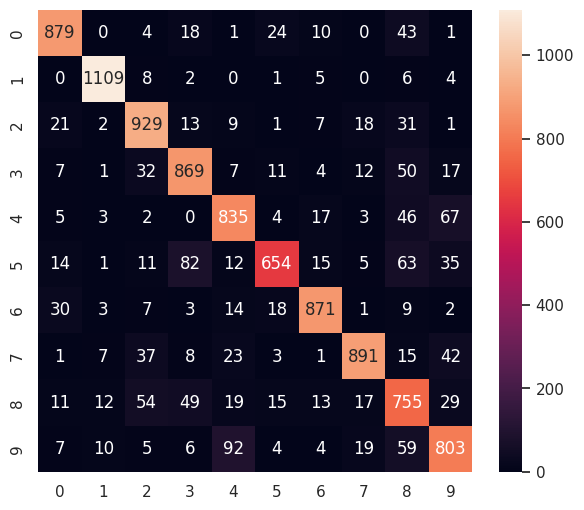

In [38]:
score_conv = model.evaluate(X_test_conv, Y_test, verbose=0)
predict_conv = model.predict(X_test_conv)
print('Test loss:', score_conv[0])
print('Test accuracy:', score_conv[1])
print("Time Running: %.2f seconds" %t_train_conv )

fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax = sb.heatmap(pd.DataFrame(confusion_matrix(Y_test, predict_conv.argmax(1))), annot=True, fmt="d")

**Q** Comment the results.

**Q** How to improve them?